In [1]:
import pandas as pd

df = pd.read_csv("country_data.csv")

df

country  child_mort  exports  health  imports  income  \
0            Afghanistan        90.2     10.0    7.58     44.9    1610   
1                Albania        16.6     28.0    6.55     48.6    9930   
2                Algeria        27.3     38.4    4.17     31.4   12900   
3                 Angola       119.0     62.3    2.85     42.9    5900   
4    Antigua and Barbuda        10.3     45.5    6.03     58.9   19100   
..                   ...         ...      ...     ...      ...     ...   
162              Vanuatu        29.2     46.6    5.25     52.7    2950   
163            Venezuela        17.1     28.5    4.91     17.6   16500   
164              Vietnam        23.3     72.0    6.84     80.2    4490   
165                Yemen        56.3     30.0    5.18     34.4    4480   
166               Zambia        83.1     37.0    5.89     30.9    3280   

     inflation  life_expec  total_fer   gdpp  
0         9.44        56.2       5.82    553  
1         4.49        76.3       1.65   4090  
2        16.10        76.5       2.89   4460  
3        22.40        60.1       6.16   3530  
4         1.44        76.8       2.13  12200  
..         ...         ...        ...    ...  
162       2.62        63.0       3.50   2970  
163      45.90        75.4       2.47  13500  
164      12.10        73.1       1.95   1310  
165      23.60        67.5       4.67   1310  
166      14.00        52.0       5.40   1460  

[167 rows x 10 columns]

In [2]:
df.shape

(167, 10)

In [3]:
df.describe()

child_mort     exports      health     imports         income  \
count  167.000000  167.000000  167.000000  167.000000     167.000000   
mean    38.270060   41.108976    6.815689   46.890215   17144.688623   
std     40.328931   27.412010    2.746837   24.209589   19278.067698   
min      2.600000    0.109000    1.810000    0.065900     609.000000   
25%      8.250000   23.800000    4.920000   30.200000    3355.000000   
50%     19.300000   35.000000    6.320000   43.300000    9960.000000   
75%     62.100000   51.350000    8.600000   58.750000   22800.000000   
max    208.000000  200.000000   17.900000  174.000000  125000.000000   

        inflation  life_expec   total_fer           gdpp  
count  167.000000  167.000000  167.000000     167.000000  
mean     7.781832   70.555689    2.947964   12964.155689  
std     10.570704    8.893172    1.513848   18328.704809  
min     -4.210000   32.100000    1.150000     231.000000  
25%      1.810000   65.300000    1.795000    1330.000000  
50%      5.390000   73.100000    2.410000    4660.000000  
75%     10.750000   76.800000    3.880000   14050.000000  
max    104.000000   82.800000    7.490000  105000.000000

array([[<Axes: title={'center': 'child_mort'}>,
        <Axes: title={'center': 'income'}>],
       [<Axes: title={'center': 'gdpp'}>, <Axes: >]], dtype=object)

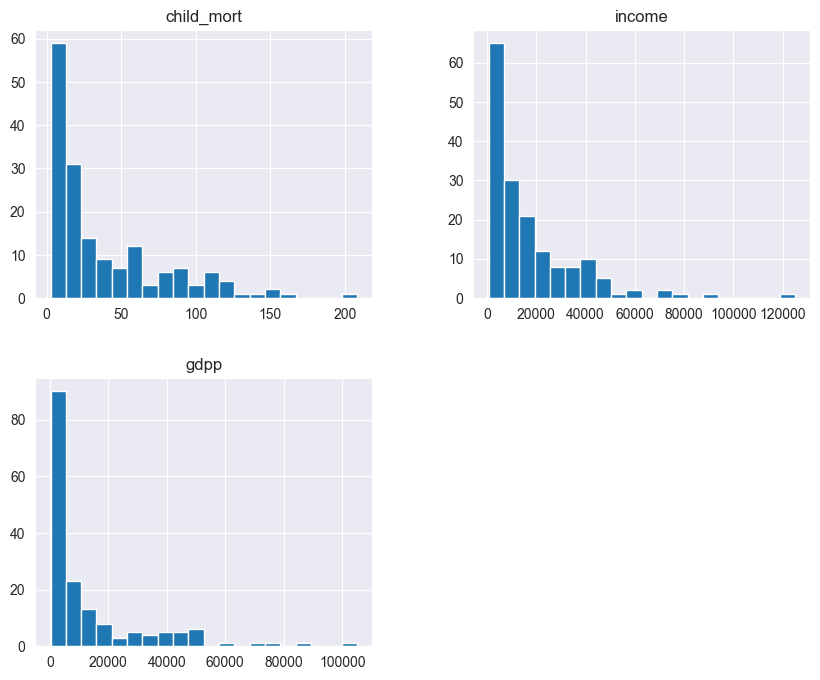

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

df[['child_mort', 'income', 'gdpp']].hist(bins=20, figsize=(10, 8))

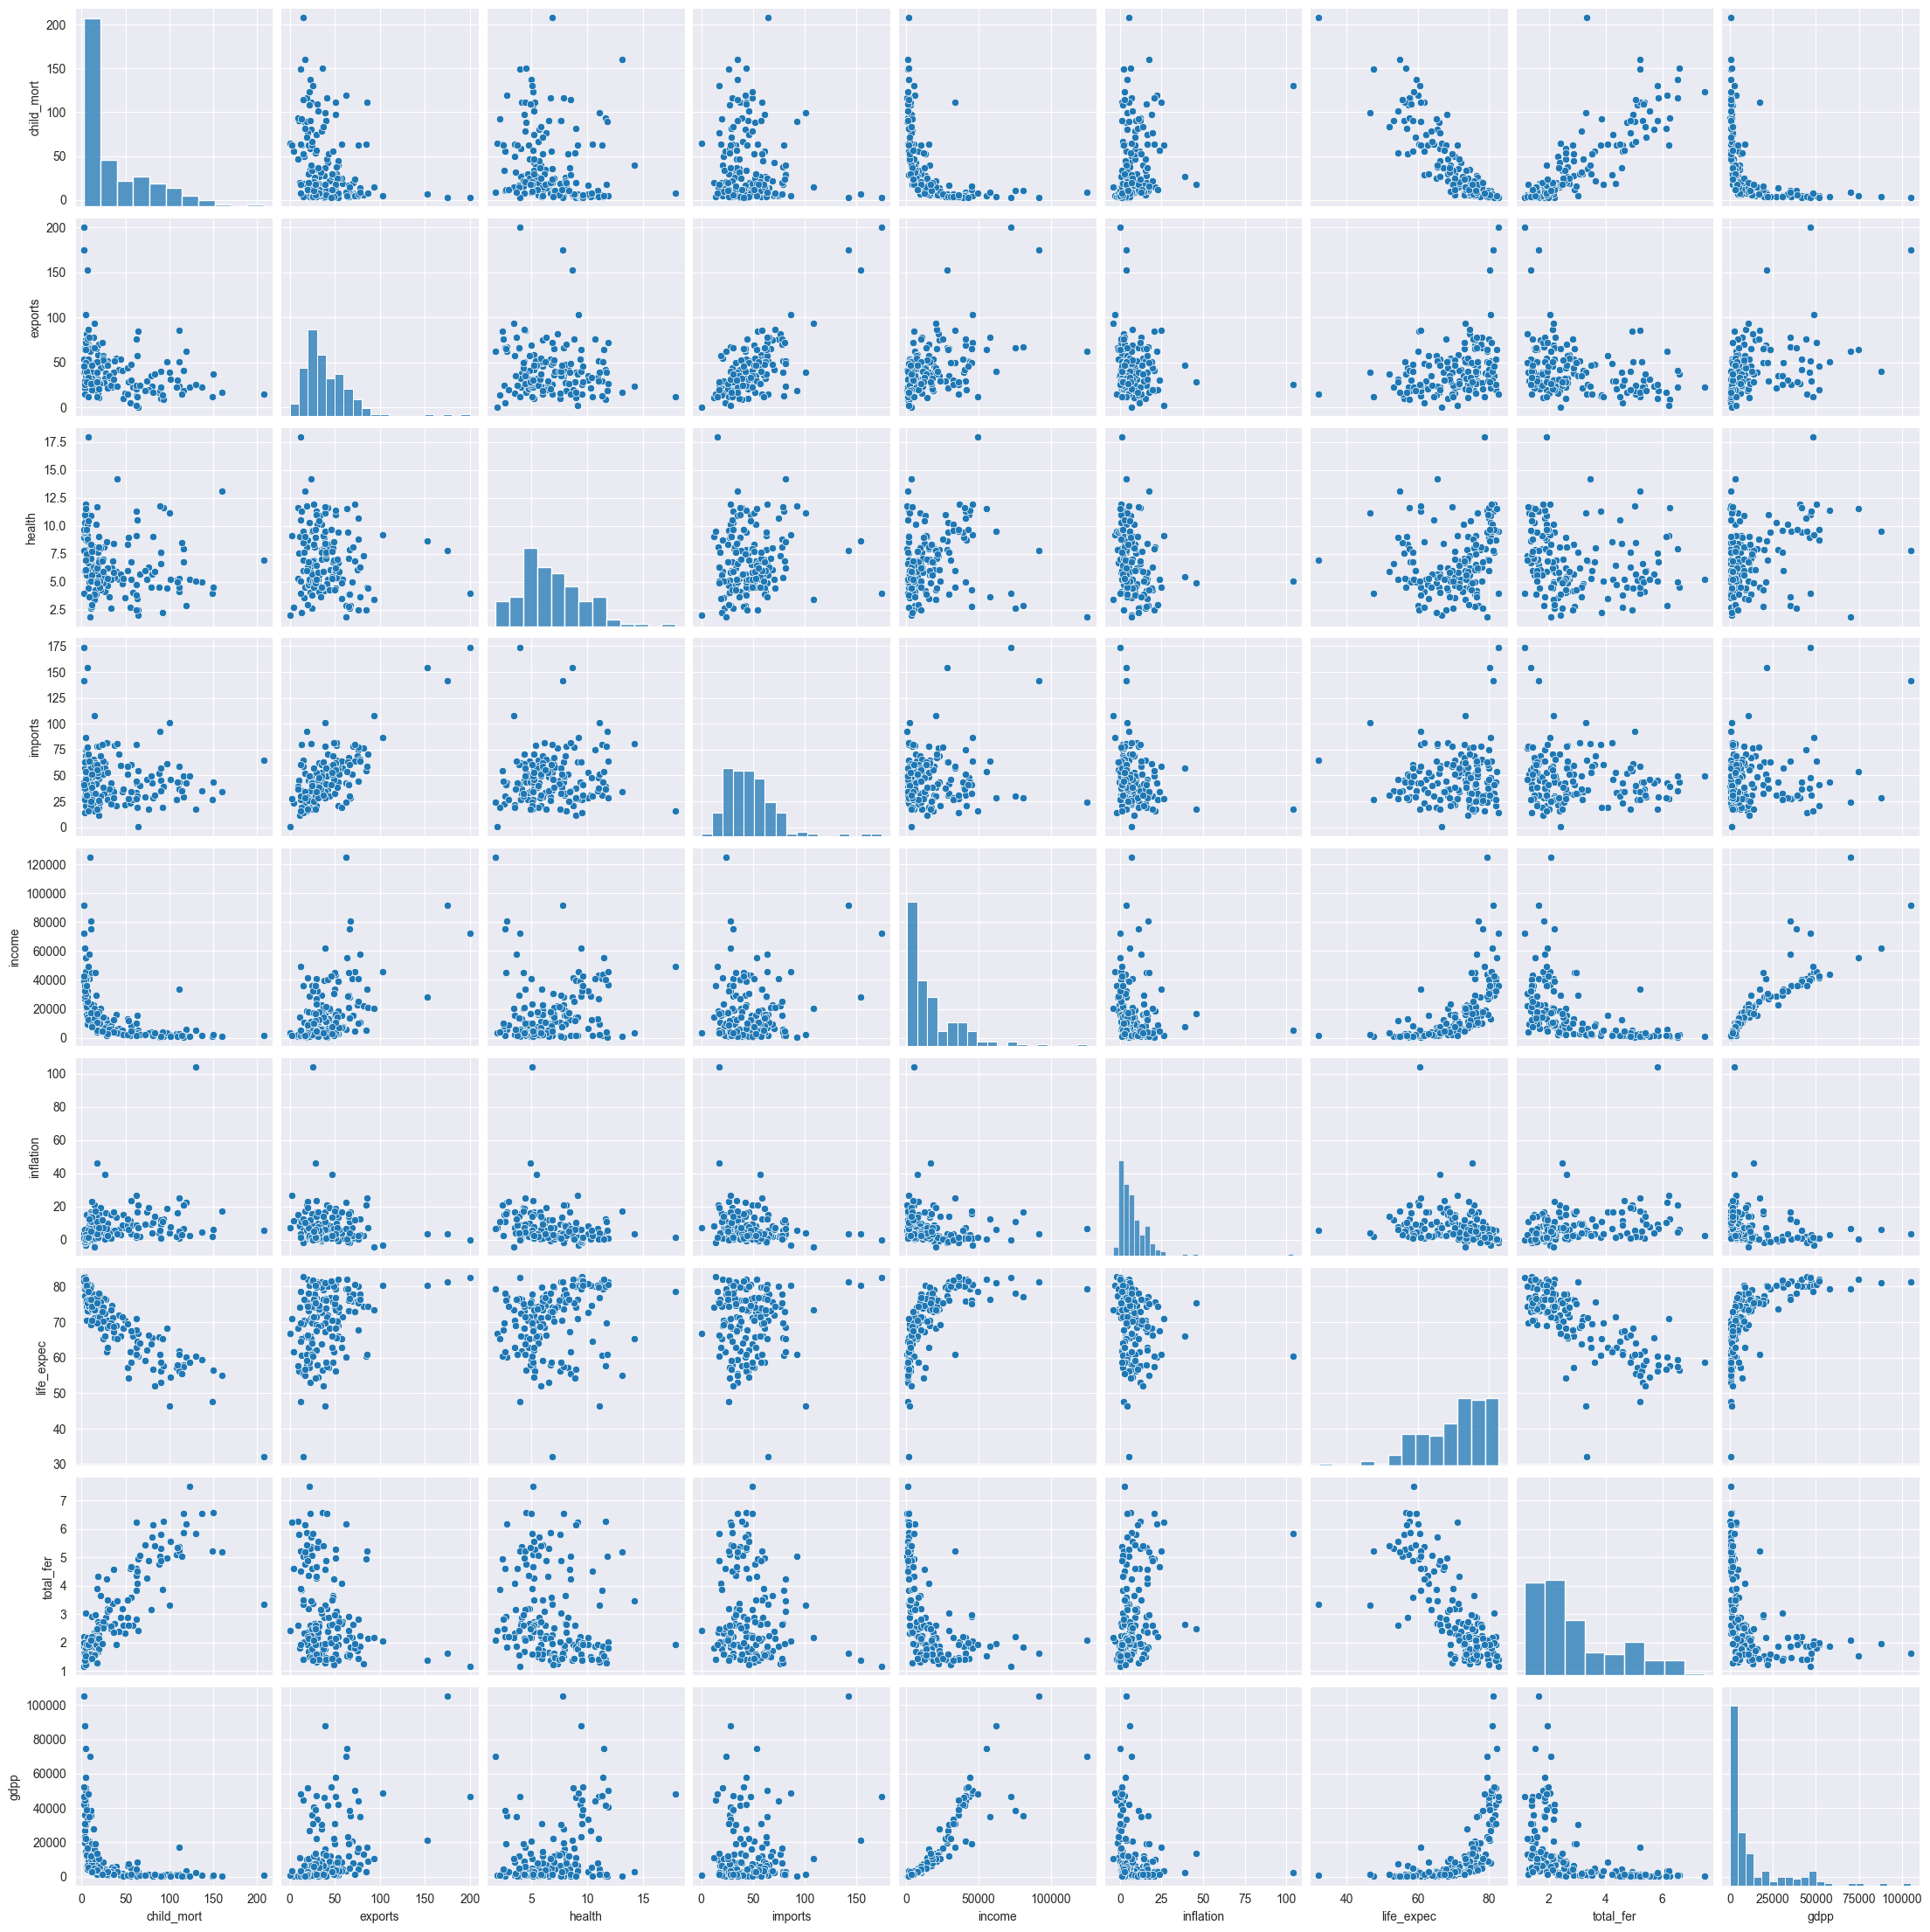

In [5]:
sns.pairplot(df)
plt.show()

In [6]:
df_cluster1 = df.drop('country', axis=1)

In [7]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
features = ['child_mort', 'exports', 'health', 'imports', 'income','inflation', 'life_expec', 'total_fer', 'gdpp']

df_cluster1[features] = scaler.fit_transform(df_cluster1[features])

df_cluster1.head()

child_mort   exports    health   imports    income  inflation  life_expec  \
0    1.291532 -1.138280  0.279088 -0.082455 -0.808245   0.157336   -1.619092   
1   -0.538949 -0.479658 -0.097016  0.070837 -0.375369  -0.312347    0.647866   
2   -0.272833 -0.099122 -0.966073 -0.641762 -0.220844   0.789274    0.670423   
3    2.007808  0.775381 -1.448071 -0.165315 -0.585043   1.387054   -1.179234   
4   -0.695634  0.160668 -0.286894  0.497568  0.101732  -0.601749    0.704258   

   total_fer      gdpp  
0   1.902882 -0.679180  
1  -0.859973 -0.485623  
2  -0.038404 -0.465376  
3   2.128151 -0.516268  
4  -0.541946 -0.041817

In [8]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=4, n_init='auto')

km.fit(df_cluster1[['child_mort', 'exports', 'health', 'imports', 'income', 'inflation', 'life_expec', 'total_fer', 'gdpp']])

KMeans(n_clusters=4)

In [9]:
km.labels_

array([2, 0, 0, 2, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 2, 0, 0, 0, 2,
       0, 1, 0, 2, 2, 0, 2, 1, 0, 2, 2, 0, 0, 0, 2, 2, 2, 0, 2, 0, 1, 0,
       1, 0, 0, 0, 0, 2, 2, 0, 0, 1, 1, 2, 2, 0, 1, 2, 1, 0, 0, 2, 2, 0,
       2, 0, 1, 0, 0, 0, 2, 1, 1, 1, 0, 1, 0, 0, 2, 2, 1, 0, 2, 0, 0, 2,
       2, 0, 0, 3, 0, 2, 2, 0, 0, 2, 3, 2, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0,
       1, 1, 2, 2, 1, 0, 2, 0, 0, 0, 0, 0, 1, 1, 0, 0, 2, 0, 0, 2, 0, 0,
       2, 3, 0, 1, 0, 2, 1, 1, 0, 0, 2, 0, 1, 1, 0, 2, 0, 2, 2, 0, 0, 0,
       0, 2, 0, 1, 1, 1, 0, 0, 0, 0, 0, 2, 2], dtype=int32)

In [10]:
km.inertia_

700.3229986404374

In [11]:
centroids = km.cluster_centers_
centroids

array([[-0.41982697,  0.00664849, -0.21172363,  0.04758146, -0.21727424,
        -0.03495325,  0.26841956, -0.43822217, -0.33080531],
       [-0.82860929,  0.17262066,  0.85918977, -0.29637276,  1.46227512,
        -0.47818851,  1.10764922, -0.76368146,  1.66190214],
       [ 1.36021776, -0.43753313, -0.15598401, -0.18920377, -0.68689408,
         0.40211078, -1.28217981,  1.36494385, -0.60424243],
       [-0.84900324,  4.93567278, -0.00816303,  4.54805768,  2.4395424 ,
        -0.50420614,  1.22682431, -1.03886271,  2.44079735]])

In [12]:
df['cluster'] = km.labels_

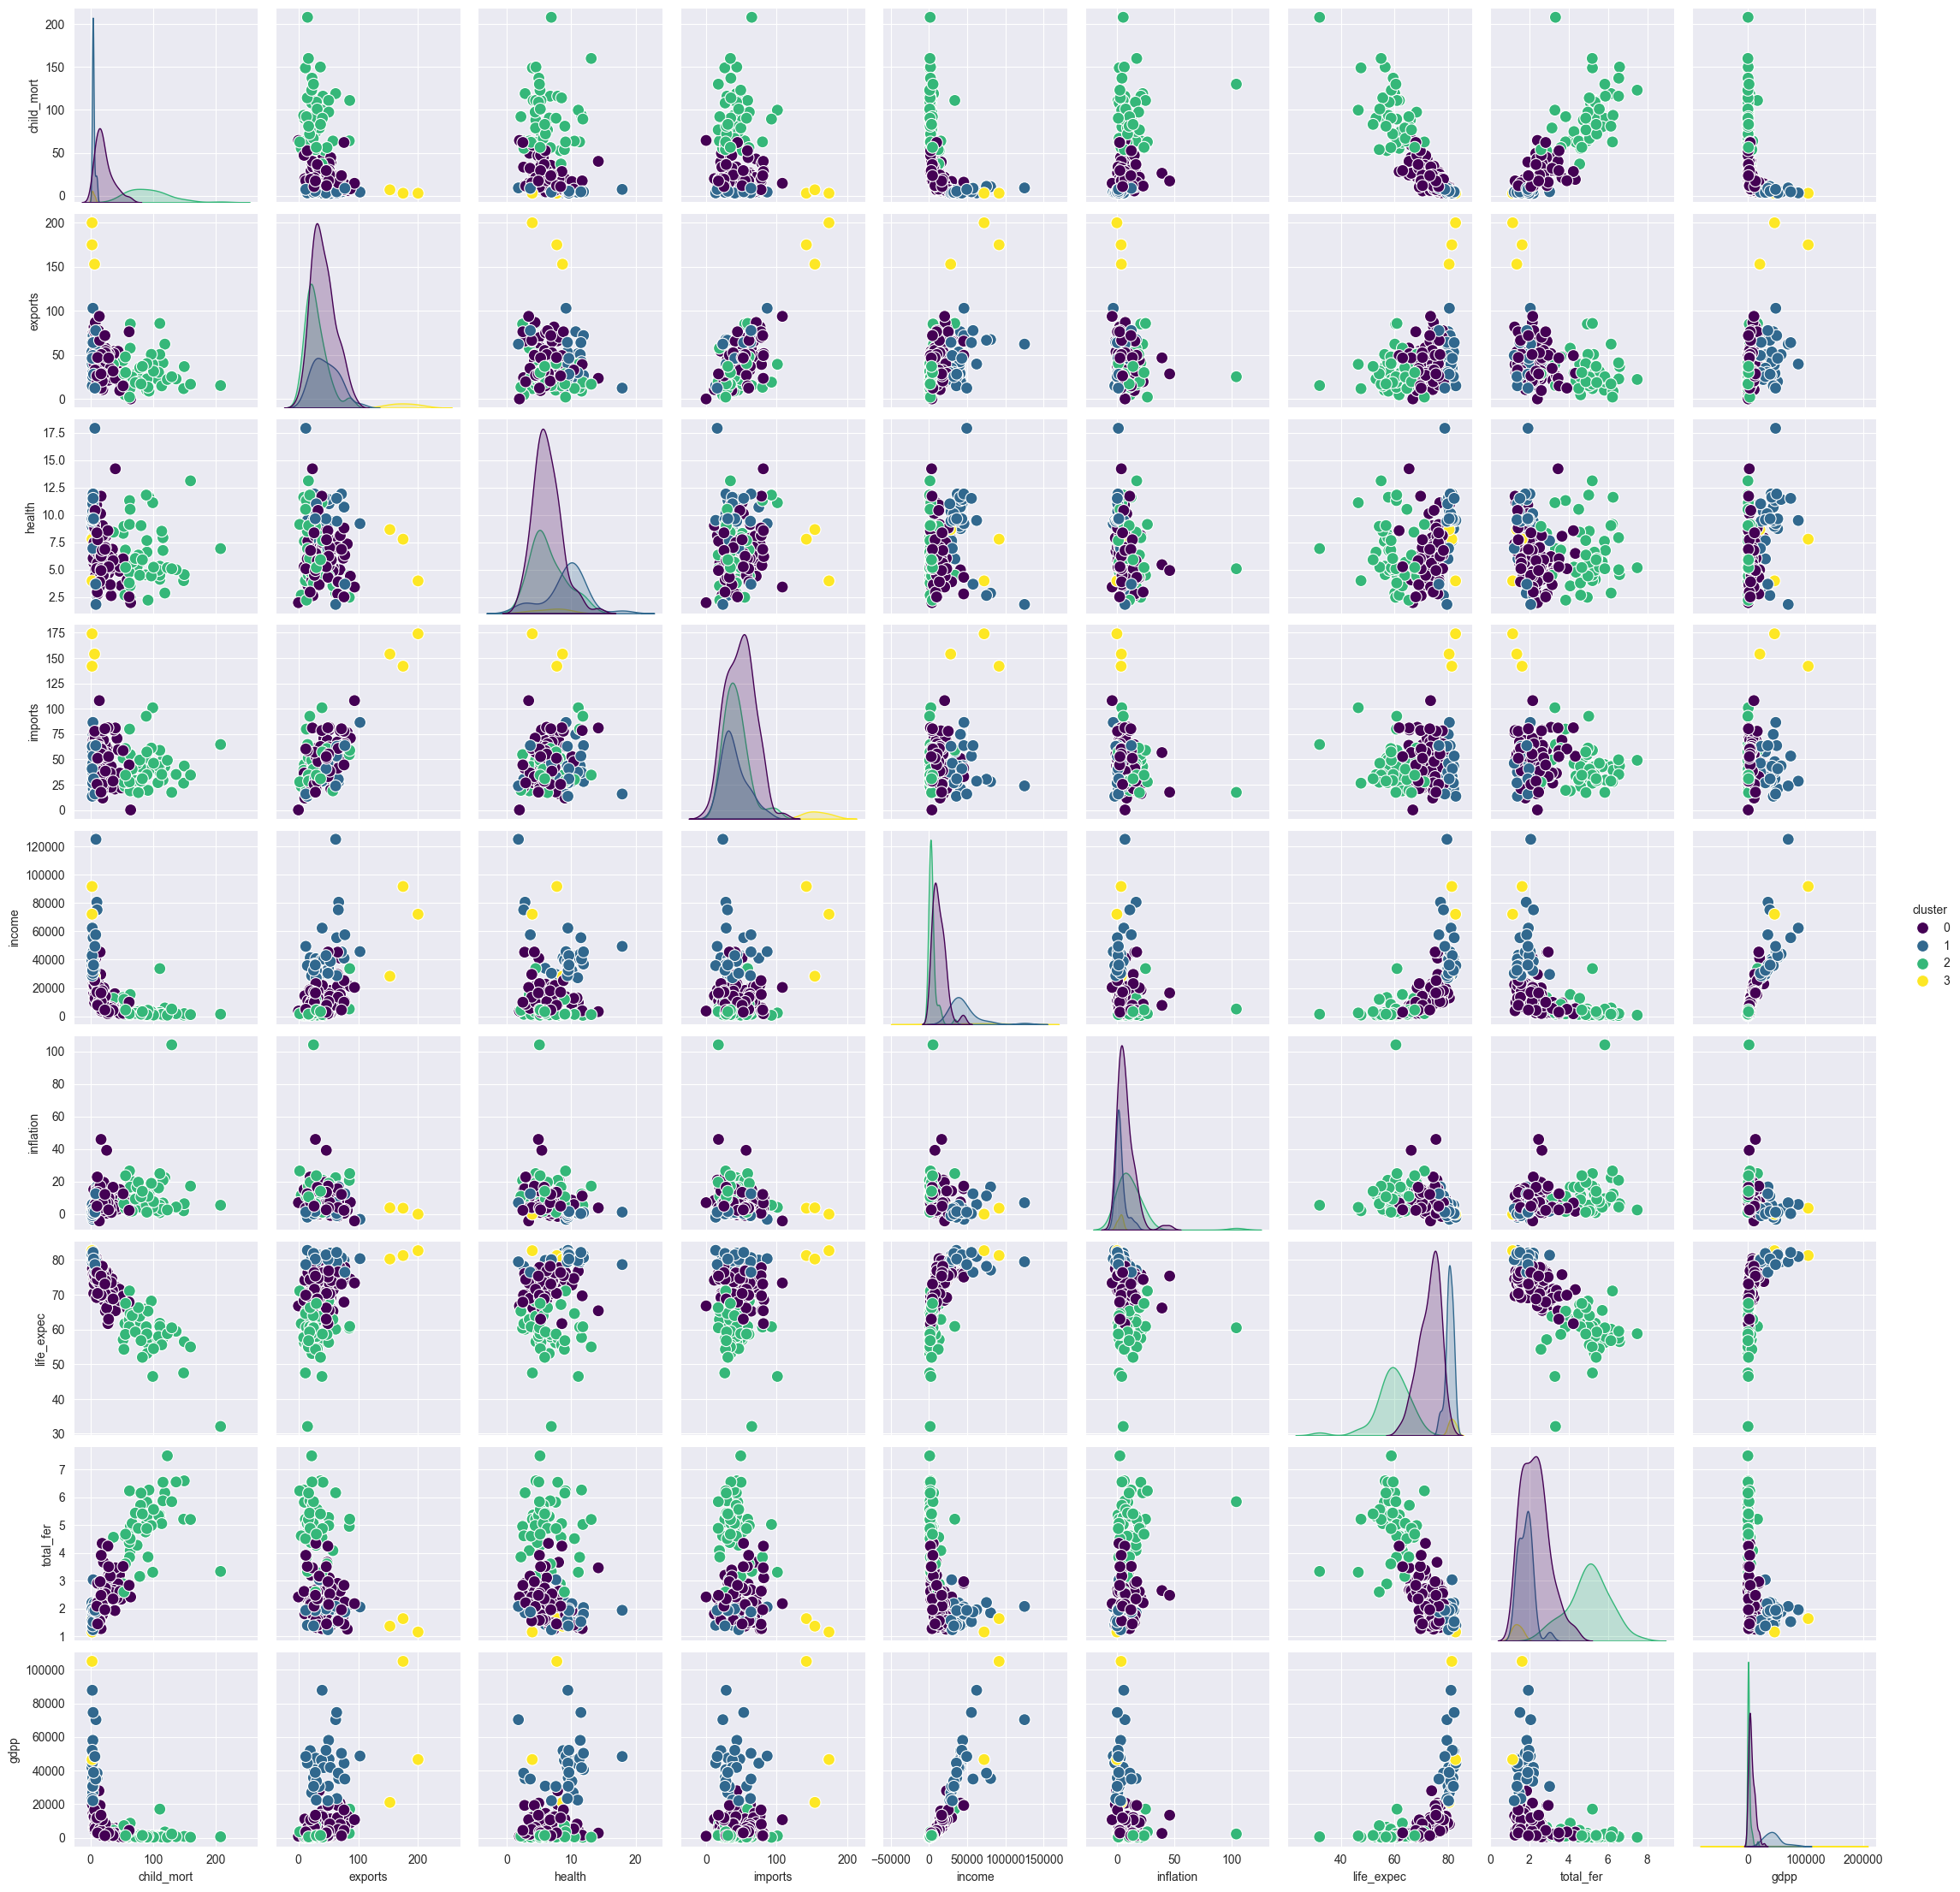

In [13]:
sns.pairplot(df, hue='cluster', palette='viridis', diag_kind='kde', plot_kws={'s': 100})
plt.show()

In [14]:
sse = []
k_rng = range(4, 15)
for k in k_rng:
    km = KMeans(n_clusters=k, n_init='auto')
    km.fit(df_cluster1)
    sse.append(km.inertia_)

print(sse)

[751.1915754969668, 620.3621532663788, 599.7041461288248, 563.0461113536469, 467.61465130043143, 432.66697011340875, 423.49008403599294, 395.55418457773425, 367.6913403197517, 349.934396726519, 362.76588826441207]


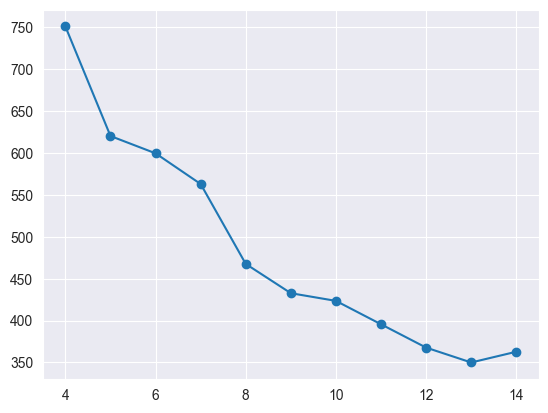

In [15]:
plt.plot(k_rng, sse, marker='o')

In [16]:
km = KMeans(n_clusters=6, n_init='auto')

km.fit(df_cluster1)

df['cluster'] = km.labels_

In [17]:
km.inertia_

575.5913923770339

In [18]:
centroids = km.cluster_centers_
print(centroids)

[[ 0.98437961  0.5308375  -0.95450994 -0.22884158 -0.24902653  3.32746394
  -0.74877547  1.05812442 -0.32774647]
 [-0.05233302 -0.45611673 -0.57723287 -0.62825619 -0.36869403  0.25373999
  -0.05827146 -0.07476413 -0.45411328]
 [-0.82629395  0.14381033  0.88523713 -0.34020983  1.52062129 -0.46696693
   1.11229484 -0.74497217  1.74235844]
 [-0.56883976  0.33169262  0.06419075  0.49058575 -0.10355891 -0.32173411
   0.37927342 -0.59409188 -0.23226847]
 [ 1.50399895 -0.60655281  0.03329018 -0.09938214 -0.79123508  0.04552033
  -1.38353458  1.50781008 -0.65659451]
 [-0.84900324  4.93567278 -0.00816303  4.54805768  2.4395424  -0.50420614
   1.22682431 -1.03886271  2.44079735]]


In [19]:
from sklearn.cluster import AgglomerativeClustering

hc = AgglomerativeClustering(n_clusters=6, metric='cosine', linkage='complete')
hc.fit(df_cluster1)

df['cluster_hc'] = hc.labels_
df.head()

country  child_mort  exports  health  imports  income  \
0          Afghanistan        90.2     10.0    7.58     44.9    1610   
1              Albania        16.6     28.0    6.55     48.6    9930   
2              Algeria        27.3     38.4    4.17     31.4   12900   
3               Angola       119.0     62.3    2.85     42.9    5900   
4  Antigua and Barbuda        10.3     45.5    6.03     58.9   19100   

   inflation  life_expec  total_fer   gdpp  cluster  cluster_hc  
0       9.44        56.2       5.82    553        4           4  
1       4.49        76.3       1.65   4090        3           0  
2      16.10        76.5       2.89   4460        1           1  
3      22.40        60.1       6.16   3530        0           5  
4       1.44        76.8       2.13  12200        3           0

In [20]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

subset_df = df.iloc[:50]
features = ['child_mort', 'exports', 'health', 'imports', 'income','inflation', 'life_expec', 'total_fer', 'gdpp']
X_subset = subset_df[features]

Z_subset = linkage(X_subset, method='complete')

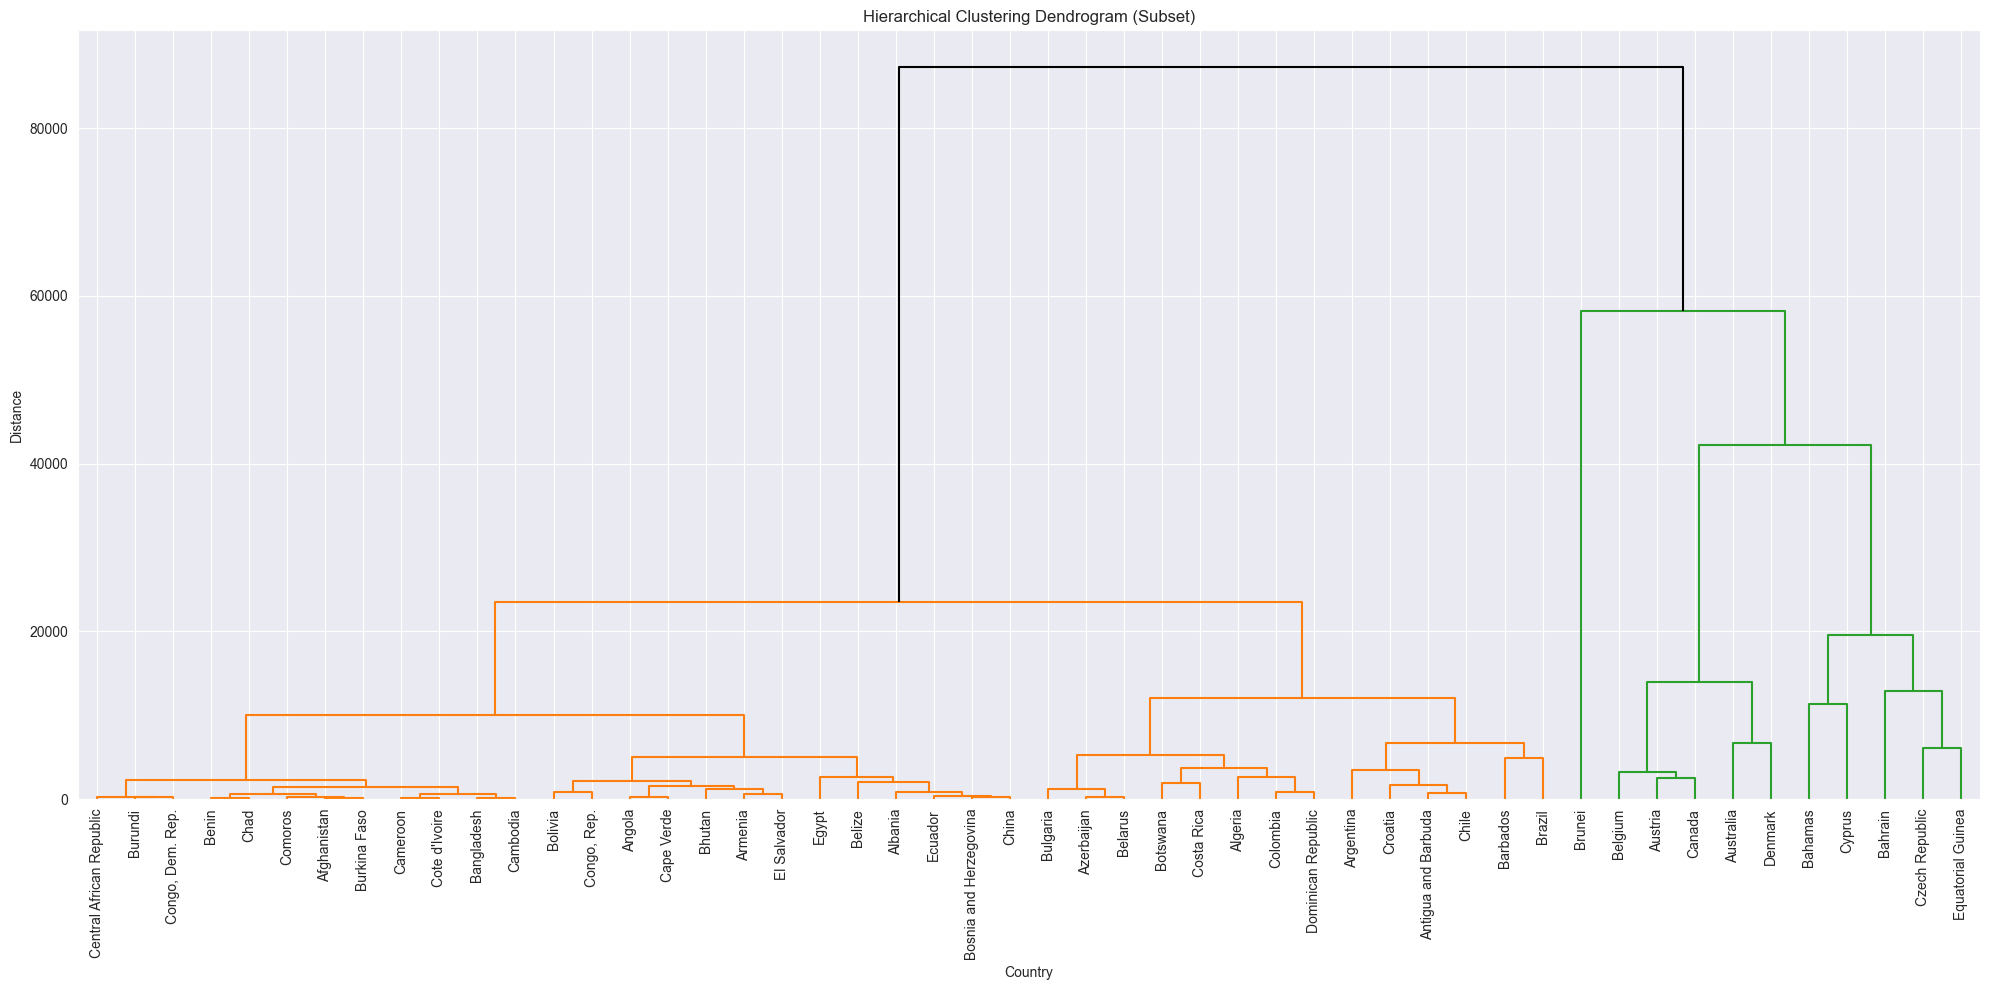

In [21]:
plt.figure(figsize=(20, 10))
plt.title('Hierarchical Clustering Dendrogram (Subset)')
dendrogram(Z_subset, labels=subset_df['country'].values, leaf_rotation=90, leaf_font_size=10, above_threshold_color='black')
plt.xlabel('Country')
plt.ylabel('Distance')
plt.grid(True)
plt.xticks(rotation=90, fontsize=10)
plt.tight_layout()
plt.show()

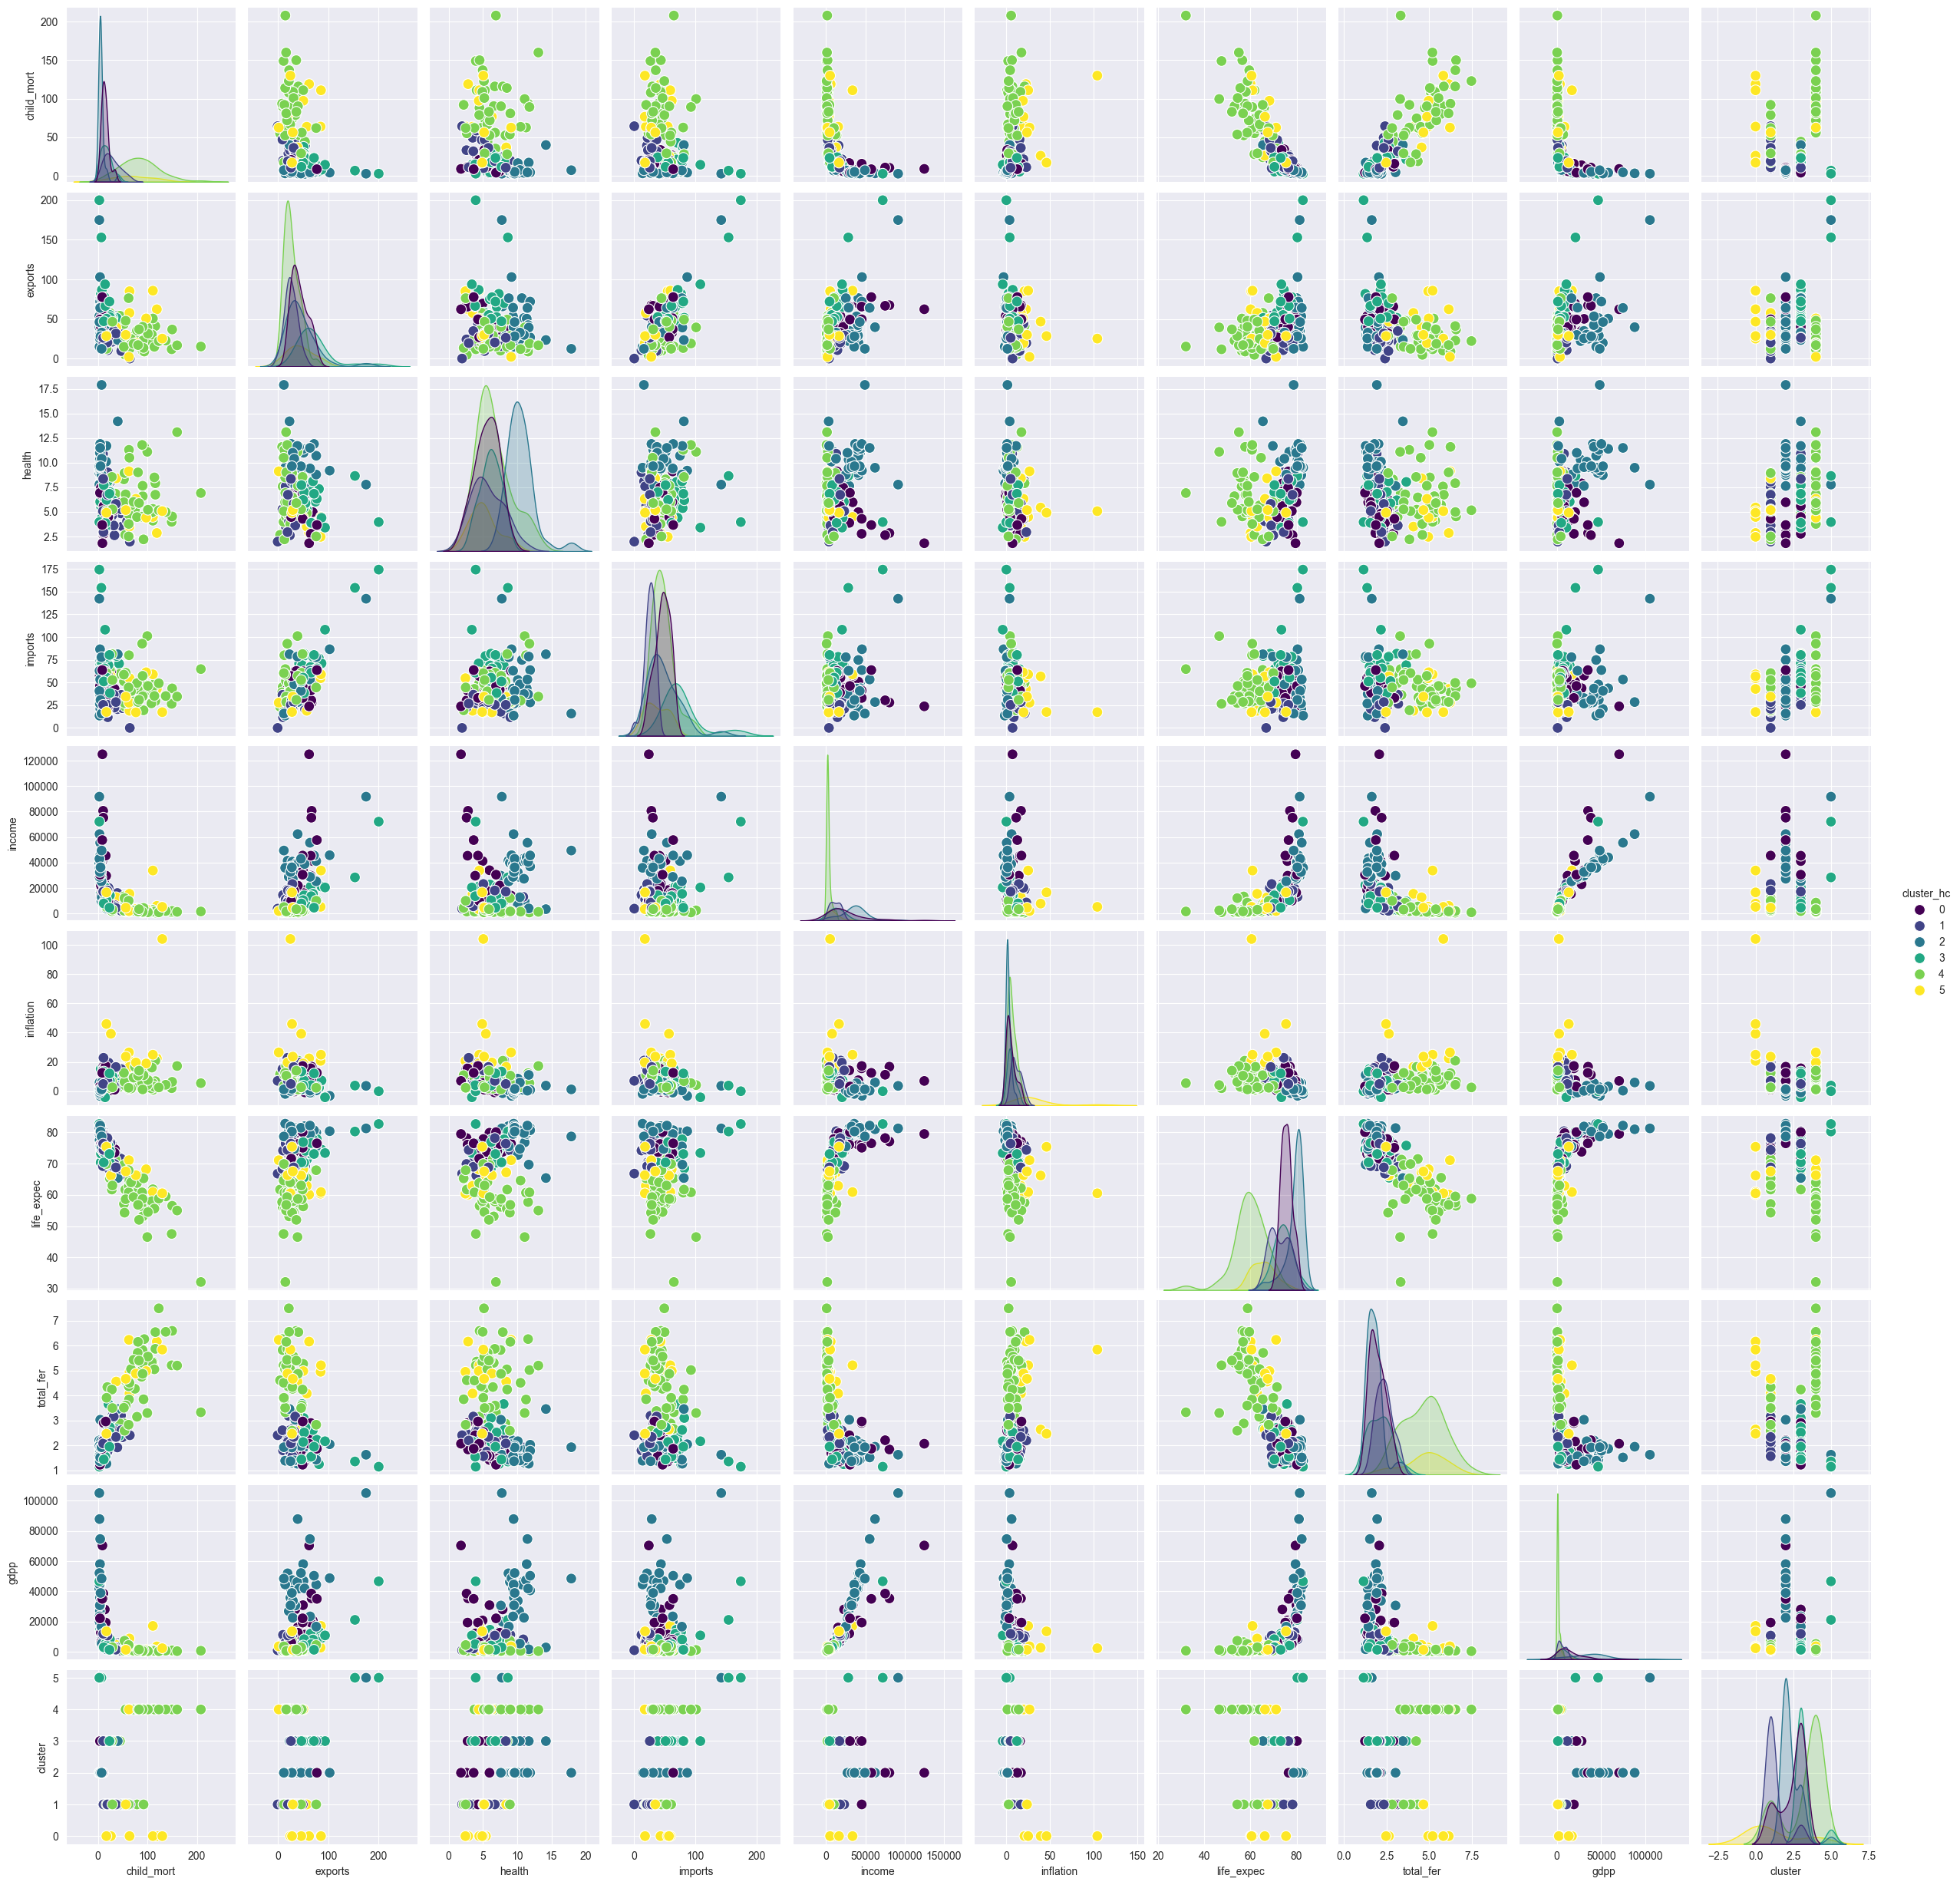

In [22]:
sns.pairplot(df, hue='cluster_hc', palette='viridis', diag_kind='kde', plot_kws={'s': 100})

### KMeans Clustering and DBSCAN for Country Data

In [23]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN

In [24]:
df = pd.read_csv("country_data.csv")

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


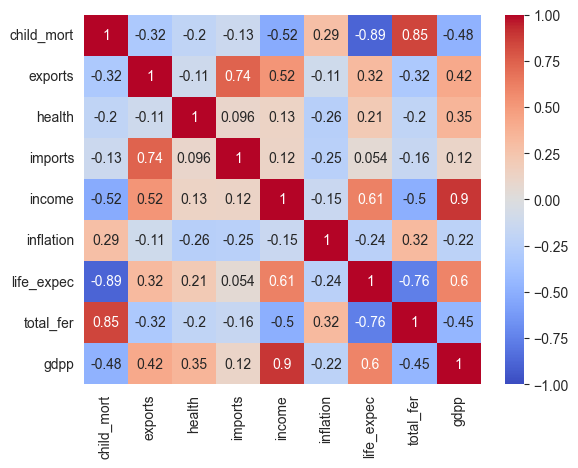

In [28]:
sns.heatmap(df.drop('country', axis=1).corr(), vmin=-1, vmax=1, annot=True, cmap='coolwarm')
plt.show()

In [30]:
count_data = df[['child_mort', 'imports', 'gdpp']]

In [31]:
count_data

child_mort  imports   gdpp
0          90.2     44.9    553
1          16.6     48.6   4090
2          27.3     31.4   4460
3         119.0     42.9   3530
4          10.3     58.9  12200
..          ...      ...    ...
162        29.2     52.7   2970
163        17.1     17.6  13500
164        23.3     80.2   1310
165        56.3     34.4   1310
166        83.1     30.9   1460

[167 rows x 3 columns]

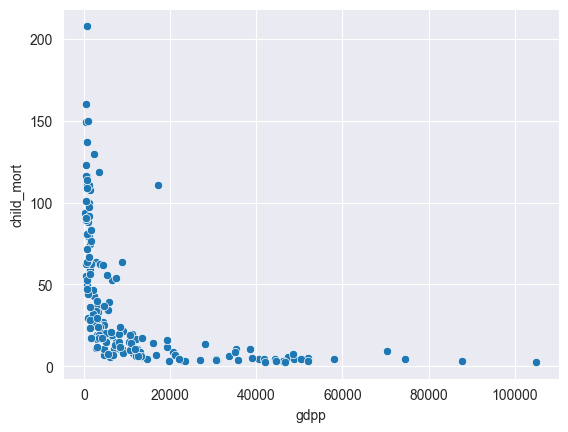

In [32]:
sns.scatterplot(x = 'gdpp', y = 'child_mort', data = count_data)
plt.show()

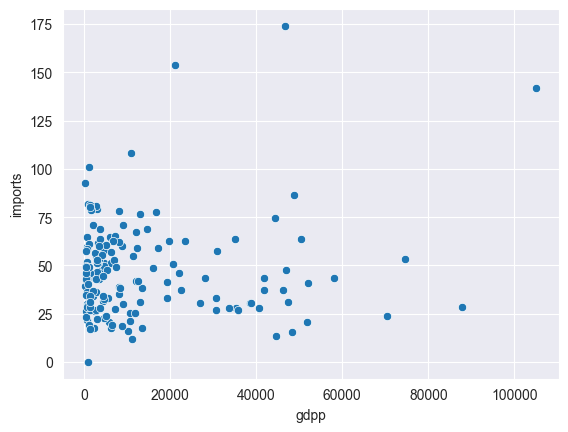

In [33]:
sns.scatterplot(x = 'gdpp', y = 'imports', data = count_data)
plt.show()

In [46]:
sse = []
k_rng = range(1, 11)
for k in k_rng:
    km = KMeans(n_clusters=k, n_init='auto')
    km.fit(count_data)
    sse.append(km.inertia_)

print(sse)

[55766642993.41933, 13270392241.25182, 6810238886.78798, 3612842813.1951942, 3039238118.2426944, 1696866387.740037, 1444297016.079845, 1074256716.2548726, 795797882.7258621, 640467009.5702226]


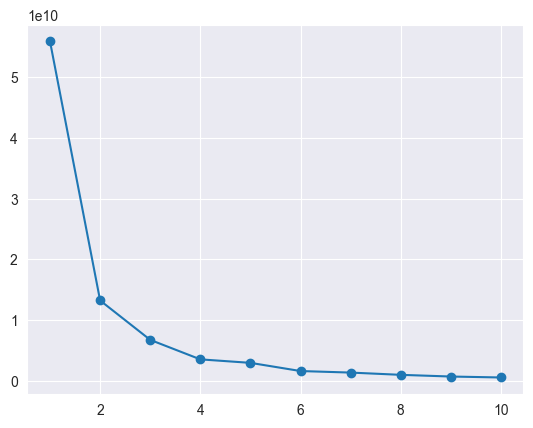

In [47]:
plt.plot(k_rng, sse, marker='o')

In [48]:
kmeans = KMeans(n_clusters = 2)
kmeans.fit(count_data)
country_clust = count_data.copy()
country_clust['clustkmeans'] = kmeans.labels_

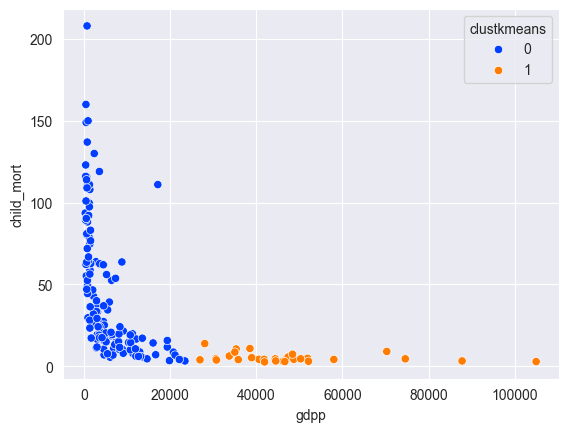

In [49]:
sns.scatterplot(x = 'gdpp', y = 'child_mort', data = country_clust, hue = 'clustkmeans', palette = 'bright')
plt.show()

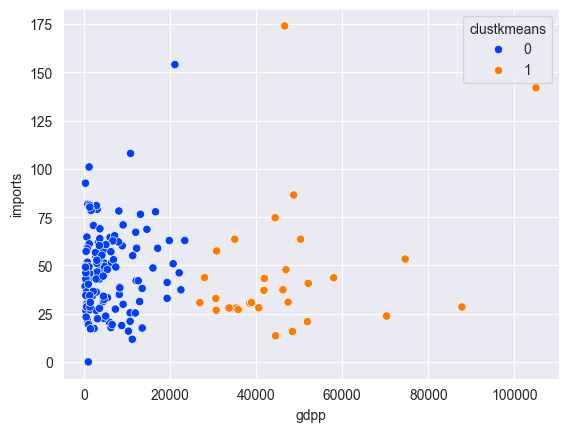

In [50]:
sns.scatterplot(x = 'gdpp', y = 'imports', data = country_clust, hue = 'clustkmeans', palette = 'bright')
plt.show()

In [ ]:
#### DBSCAN

In [54]:
scaler = StandardScaler()
country_clust_scaled = scaler.fit_transform(country_clust)

for eps in [i/10 for i in range(2,5)]:
    for min_samples in range (7,9):
        print(f'\neps {eps}')
        print(f'\nmin samples {min_samples}')

        dbscan = DBSCAN(eps = eps, min_samples=min_samples)
        labels = dbscan.fit_predict(country_clust_scaled)
        score = silhouette_score(country_clust_scaled, labels)

        print(f'clusters present: {np.unique(labels)}')
        print(f'clusters sizes: {np.bincount(labels + 1)}')
        print(f'Silhouette Score: {score}')
        print('*'*50)


eps 0.2

min samples 7
clusters present: [-1  0]
clusters sizes: [156  11]
Silhouette Score: -0.2393615335452477
**************************************************

eps 0.2

min samples 8
clusters present: [-1  0]
clusters sizes: [156  11]
Silhouette Score: -0.2393615335452477
**************************************************

eps 0.3

min samples 7
clusters present: [-1  0  1  2]
clusters sizes: [119  30  11   7]
Silhouette Score: -0.16956825899706862
**************************************************

eps 0.3

min samples 8
clusters present: [-1  0  1]
clusters sizes: [130  29   8]
Silhouette Score: -0.1513864477188696
**************************************************

eps 0.4

min samples 7
clusters present: [-1  0  1]
clusters sizes: [ 53 101  13]
Silhouette Score: 0.2581064152198133
**************************************************

eps 0.4

min samples 8
clusters present: [-1  0  1  2]
clusters sizes: [70 78 11  8]
Silhouette Score: 0.1185914800471865
************************

In [55]:
dbscan = DBSCAN(eps = 0.4, min_samples = 7)
labels = dbscan.fit_predict(country_clust_scaled)
country_clust['clustdbscan'] = labels

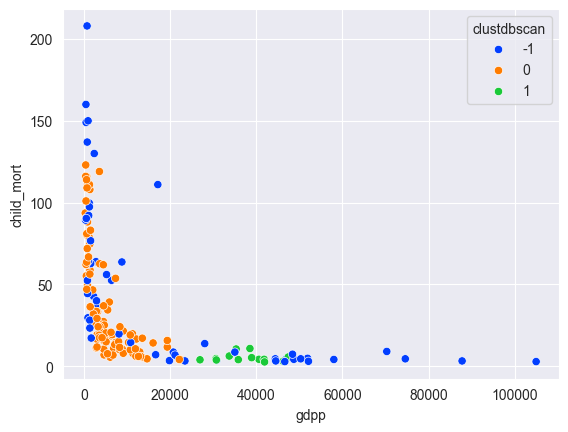

In [56]:
sns.scatterplot(x = 'gdpp', y = 'child_mort', data = country_clust, hue = 'clustdbscan', palette = 'bright')
plt.show()

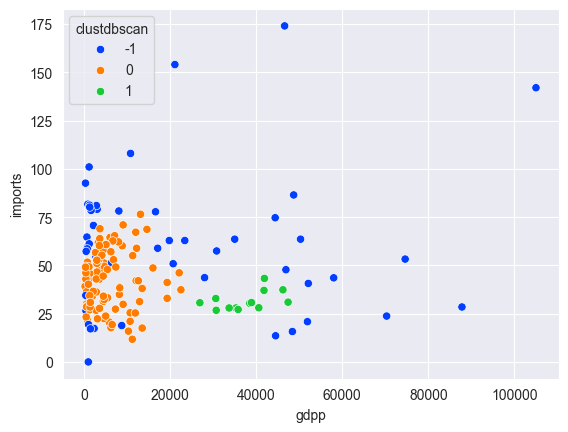

In [57]:
sns.scatterplot(x = 'gdpp', y = 'imports', data = country_clust, hue = 'clustdbscan', palette = 'bright')
plt.show()

In [62]:
hc = AgglomerativeClustering(n_clusters=3, metric='cosine', linkage='complete')
hc.fit(country_clust_scaled)

country_clust['clustagglo'] = hc.labels_

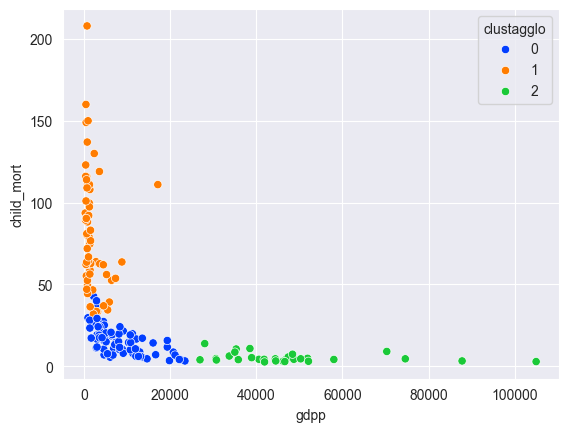

In [63]:
sns.scatterplot(x = 'gdpp', y = 'child_mort', data = country_clust, hue = 'clustagglo', palette = 'bright')
plt.show()

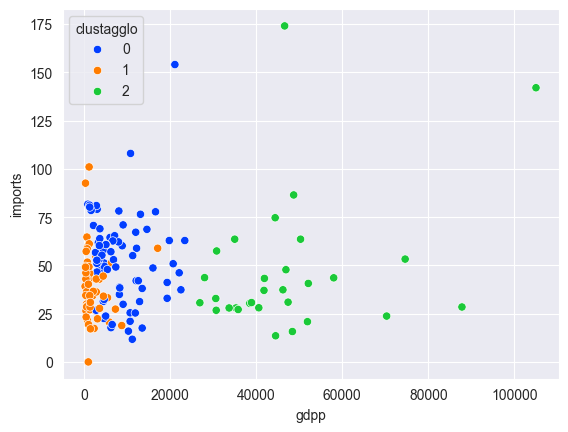

In [64]:
sns.scatterplot(x = 'gdpp', y = 'imports', data = country_clust, hue = 'clustagglo', palette = 'bright')
plt.show()